In [3]:
import sys 
sys.path.append("D:/Work/Programming/Biotissue electroconductivity/OTE")

from input import cnf, properties, condition_start
from input import condition_boundary_optic, condition_boundary_electric, condition_boundary_termal
from combiner import solver, step_solver

import numpy as np
from matplotlib import pylab as plt
import csv
 
import time
import cProfile

cnf = {
    "N": 60,
    "dn": 1 * 10 ** (-5),
    "M": 60,
    "dm": 5 * 10 ** (-5),
    "K": 10,
    "dk": 3 * 10 ** (-4)
}
cnf['NAir'] = int(cnf['N'])
cnf["el1_M"] = int(1 * cnf['M'] / 3)
cnf['el2_M'] = int(2 * cnf['M'] / 3)

N = cnf['N']
M = cnf['M']
K = cnf['K']
dn = cnf['dn']
dm = cnf['dm']
dk = cnf['dk']

In [2]:
"""
Профилирование
ncalls – это количество совершенных вызовов;
tottime – это все время, потраченное в данной функции;
percall – ссылается на коэффициент tottime, деленный на ncalls;
cumtime – совокупное время, потраченное как в данной функции, так и наследуемых функциях. Это работает также и с рекурсивными функциями!
Второй столбец percall – это коэффициент cumtime деленный на примитивные вызовы;
filename:lineno(function) предоставляет соответствующие данные о каждой функции
"""
# cProfile.run("solver(cnf, properties, condition_start, condition_boundary_optic, condition_boundary_electric,condition_boundary_termal)",
#              sort = 'cumtime')

'\nПрофилирование\nncalls – это количество совершенных вызовов;\ntottime – это все время, потраченное в данной функции;\npercall – ссылается на коэффициент tottime, деленный на ncalls;\ncumtime – совокупное время, потраченное как в данной функции, так и наследуемых функциях. Это работает также и с рекурсивными функциями!\nВторой столбец percall – это коэффициент cumtime деленный на примитивные вызовы;\nfilename:lineno(function) предоставляет соответствующие данные о каждой функции\n'

In [4]:
sol_all = solver(cnf, properties,
                 condition_start,
                 condition_boundary_optic,
                 condition_boundary_electric,
                 condition_boundary_termal)

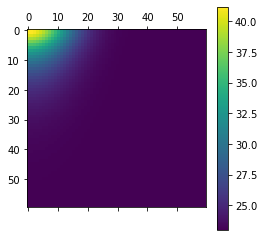

In [5]:
plt.matshow(sol_all['T'][-1])
plt.colorbar()

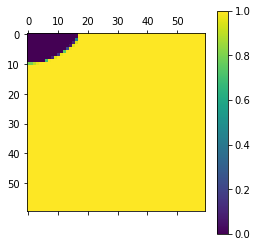

In [8]:
deg_volume = np.zeros(K)
dV_matrix = np.array([[dm * dn * m for n in range(N)] for m in range(M)])
for k in range(K):
    deg_volume[k] = ((sol_all['g'][0] - sol_all['g'][k]) * dV_matrix).sum()
# plt.plot(deg_volume)
plt.matshow(sol_all['g'][-1])
plt.colorbar()

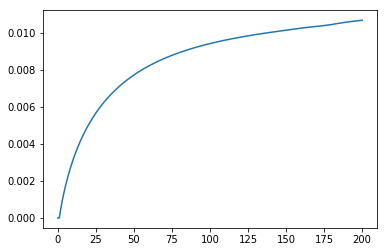

In [8]:
plt.plot(sol_all['u'][:,cnf['NAir'],cnf['el2_M']])
# plt.matshow(sol_all['u'][-1])
# plt.colorbar()

In [14]:
np.array(sol_all['u'][:,cnf['NAir'],cnf['el2_M']])

array([1.70381484e-09, 1.70381484e-09, 5.17644377e-04, 9.57056215e-04,
       1.35060449e-03, 1.70781297e-03, 2.03591535e-03, 2.33946222e-03,
       2.62197475e-03, 2.88612184e-03, 3.13405733e-03, 3.36753465e-03,
       3.58801833e-03, 3.79674547e-03, 3.99477570e-03, 4.18302517e-03,
       4.36229328e-03, 4.53328268e-03, 4.69661513e-03, 4.85284402e-03,
       5.00246447e-03, 5.14592154e-03, 5.28361696e-03, 5.41591480e-03,
       5.54314611e-03, 5.66561290e-03, 5.78359155e-03, 5.89733561e-03,
       6.00707837e-03, 6.11303490e-03, 6.21540400e-03, 6.31436976e-03,
       6.41010300e-03, 6.50276254e-03, 6.59249627e-03, 6.67944216e-03,
       6.76372909e-03, 6.84547767e-03, 6.92480089e-03, 7.00180480e-03,
       7.07658899e-03, 7.14924718e-03, 7.21986762e-03, 7.28853350e-03,
       7.35532329e-03, 7.42031129e-03, 7.48356754e-03, 7.54515842e-03,
       7.60514724e-03, 7.66359322e-03, 7.72055283e-03, 7.77608068e-03,
       7.83022826e-03, 7.88304248e-03, 7.93457003e-03, 7.98485626e-03,
      